In [1]:
#机器学习项目步骤
#1 界定问题

#导入必须的库
%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn

In [2]:
#2 获取数据

def get_data(): 
    train = pd.read_csv("input/train.csv",index_col = "PassengerId")
    test = pd.read_csv("input/test.csv", index_col="PassengerId")
    return train,test
train,test = get_data()

In [3]:
#3 探索数据 

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


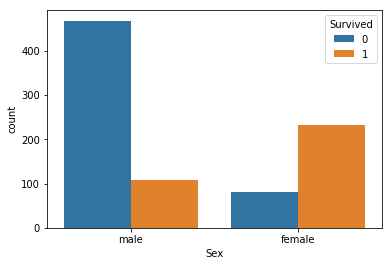

In [5]:
#查看不同性别的生存比例
sns.countplot(data=train, x="Sex", hue='Survived')

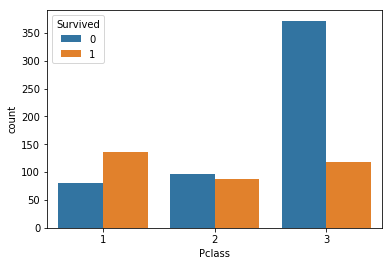

In [6]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [7]:
#查看男女幸存比例
print(train[(train.Sex=='male') & (train.Survived==1)].shape[0]/train[(train.Sex=='male')].shape[0])
print(train[(train.Sex=='female') & (train.Survived==1)].shape[0]/train[(train.Sex=='female')].shape[0])

0.18890814558058924
0.7420382165605095


In [8]:
#查看社会等级生存比例
print(train[(train.Pclass==1) & (train.Survived==1)].shape[0]/train[(train.Pclass==1)].shape[0])
print(train[(train.Pclass==2) & (train.Survived==1)].shape[0]/train[(train.Pclass==2)].shape[0])
print(train[(train.Pclass==3) & (train.Survived==1)].shape[0]/train[(train.Pclass==3)].shape[0])

0.6296296296296297
0.47282608695652173
0.24236252545824846


In [9]:
train[train.Survived==1].Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

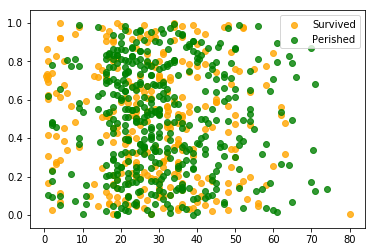

In [10]:
#查看年龄
plt.scatter(train[train.Survived==1].Age,np.random.rand(len(train[train.Survived==1])),c='orange',alpha=.8,label='Survived')
plt.scatter(train[train.Survived==0].Age,np.random.rand(len(train[train.Survived==0])),c='green',alpha=.8,label='Perished')
plt.legend(loc='upper right')
#train.Age

In [11]:
#相关性
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


D:\360software\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ACF25C0>,
      dtype=object)

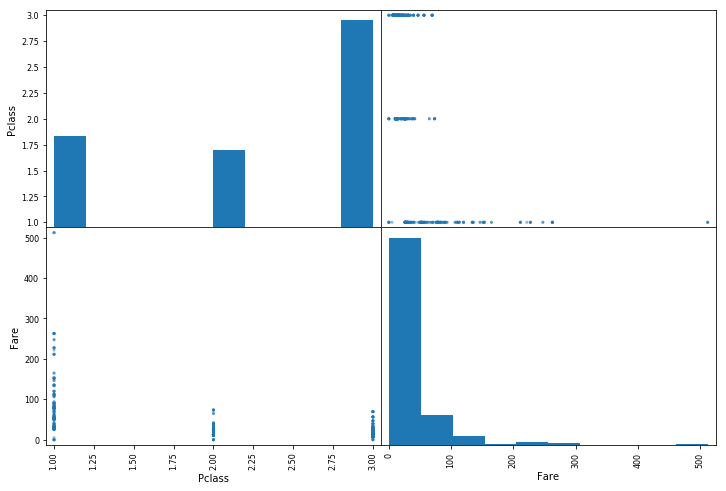

In [12]:
from pandas.tools.plotting import scatter_matrix
attributes = ['Pclass','Fare']
scatter_matrix(train[attributes],figsize=[12,8])

In [13]:
#4 预处理

In [14]:
#填补缺失值
#查看有无缺失值
print(train.isnull().sum(axis=0))
test.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [15]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
#Age   
from sklearn.preprocessing import Imputer
def age_preproecssing(dataframe):
    imputer = Imputer(strategy='mean', axis=0)
    imputer.fit(train[['Age']]) #总是用训练数据进行训练
    dataframe.Age = imputer.transform(dataframe[['Age']])
    return dataframe

train = age_preproecssing(train)
test = age_preproecssing(test)

In [17]:
#        Cabin 房间号     删除字段 
train = train.drop('Cabin',axis=1)
test = test.drop('Cabin',axis=1)

In [18]:
#  Embarked   
train.Embarked=train.Embarked.fillna('C')
test.Embarked=test.Embarked.fillna('C')

In [19]:
#  Fare         中位数
def fare_preproecssing(dataframe):
    imputer = Imputer(strategy='median', axis=0)
    imputer.fit(train[['Fare']])
    dataframe.Fare = imputer.transform(dataframe[['Fare']])
    return dataframe

train = fare_preproecssing(train)
test = fare_preproecssing(test)

In [20]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [21]:
# 1 性别编码
from sklearn.preprocessing import LabelEncoder
def sex_encoding(dataframe):
    sex_encoder = LabelEncoder()
    sex_encoder.fit(train['Sex'])
    dataframe['Sex_labeled'] = sex_encoder.transform(dataframe['Sex'])
    return dataframe

train = sex_encoding(train)
test = sex_encoding(test)

In [22]:
#Embarked 编码
'''
from sklearn.preprocessing import LabelBinarizer
class_label_embarked = LabelBinarizer()
embarked_data_onehot = class_label_embarked.fit_transform(train.Embarked)
class_label_embarked.classes_
'''

'\nfrom sklearn.preprocessing import LabelBinarizer\nclass_label_embarked = LabelBinarizer()\nembarked_data_onehot = class_label_embarked.fit_transform(train.Embarked)\nclass_label_embarked.classes_\n'

In [23]:
#Embarked的另一种方法
def add_embarkd_cols(dataframe):
    dataframe['C']=0
    dataframe['Q']=0
    dataframe['S']=0
    dataframe.loc[dataframe["Embarked"]=='C', "C"] = 1
    dataframe.loc[dataframe["Embarked"]=='Q', "Q"] = 1
    dataframe.loc[dataframe["Embarked"]=='S', "S"] = 1
    return dataframe
 
train = add_embarkd_cols(train)
test = add_embarkd_cols(test)

In [24]:
test
# 特征工程

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_labeled,C,Q,S
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q,1,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q,1,0,1,0
895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S,1,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S,0,0,0,1
897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,S,1,0,0,1
898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,Q,0,0,1,0
899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,S,1,0,0,1
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,C,0,1,0,0


In [25]:
#从名字中提取身份信息 并转换成onehot
def add_title_cols(dataframe):
    dataframe['Title'] = [name.split(", ")[1].split(". ")[0] for name in dataframe.Name]
    #Conditional that returns a boolean Series with column labels specified
    dataframe.loc[~dataframe.Title.isin(['Mr','Miss','Mrs']),'Title']='Others'
    dataframe['is_Mr']=0
    dataframe['is_Miss']=0
    dataframe['is_Mrs']=0
    dataframe['is_Others']=0
    dataframe.loc[dataframe["Title"]=='Mr', "is_Mr"] = 1
    dataframe.loc[dataframe["Title"]=='Miss', "is_Miss"] = 1
    dataframe.loc[dataframe["Title"]=='Mrs', "is_Mrs"] = 1
    dataframe.loc[dataframe["Title"]=='Others', "is_Others"] = 1
    return dataframe

train = add_title_cols(train)
test = add_title_cols(test)

In [26]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_labeled,C,Q,S,Title,is_Mr,is_Miss,is_Mrs,is_Others
PassengerId,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,0,Mr,1,0,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,0,1,Mrs,0,0,1,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,0,Mr,1,0,0,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,0,1,Mr,1,0,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,0,1,Mrs,0,0,1,0


In [27]:
#家庭人数
def add_fimaly_size_col(dataframe):
    dataframe["FamilySize"] = dataframe["SibSp"] + dataframe["Parch"] + 1
    return dataframe
    
train = add_fimaly_size_col(train)
test = add_fimaly_size_col(test) 

In [28]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Sex_labeled', 'C', 'Q', 'S', 'Title', 'is_Mr',
       'is_Miss', 'is_Mrs', 'is_Others', 'FamilySize'],
      dtype='object')

In [29]:
usable_coulumns = [ 'Pclass', 'Age','Fare', 'Sex_labeled', 'C', 'Q', 'S', 'is_Mr','is_Miss', 'is_Mrs', 'is_Others', 'FamilySize']
X_train = train[usable_coulumns]
y_train = train['Survived']
X_test = test[usable_coulumns]


In [30]:
#预处理最后一步 特征缩放
from sklearn.preprocessing import StandardScaler
def feature_scaler(data):
    std_scaler = StandardScaler()
    std_scaler.fit(X_train)
    data_scaled = std_scaler.fit_transform(data)
    return data_scaled
    
    
X_train_scaled = feature_scaler(X_train)
X_test_scaled = feature_scaler(X_test) 

In [51]:
#5 尝试不同模型 GridSearchSV RandomSearchSV
#交叉验证

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()#model
param_grid = {'n_neighbors':[1,2,3,4,5,6],'algorithm':['auto','ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(
    knn_clf, 
    param_grid=param_grid,
    cv=10, 
    scoring='accuracy',
    verbose=2
)
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_knn_clf = grid_search.best_estimator_

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] .................... algorithm=auto, n_neighbors=1, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] .................... algorithm=auto, n_neighbors=1, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] .................... algorithm=auto, n_neighbors=1, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] .................... algorithm=auto, n_neighbors=1, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] .................... algorithm=auto, n_neighbors=1, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] .................... algorithm=auto, n_neighbors=1, total=   0.0s
[CV] algorithm=auto, n_neighbors=1 ...................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .................... algorithm=auto, n_neighbors=2, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .................... algorithm=auto, n_neighbors=2, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .................... algorithm=auto, n_neighbors=2, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .................... algorithm=auto, n_neighbors=2, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] 

[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] .

[CV] ................. algorithm=kd_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3 ................................
[CV] ................. algorithm=kd_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3 ................................
[CV] ................. algorithm=kd_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3 ................................
[CV] ................. algorithm=kd_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3 ................................
[CV] ................. algorithm=kd_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3 ................................
[CV] ................. algorithm=kd_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3 ................................
[CV] ................. algorithm=kd_tree, n_neighbors=3, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3 ................................
[CV] .

[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] ................... algorithm=brute, n_neighbors=3, total=   0.0s
[CV] algorithm=brute, n_neighbors=3 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    6.2s finished


In [52]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5}

In [33]:
best_knn_clf
#knn 10 折交叉验证
sklearn.model_selection.cross_val_score(best_knn_clf,X_train,y_train,scoring='accuracy',cv=10)

array([0.65555556, 0.71111111, 0.74157303, 0.74157303, 0.73033708,
       0.71910112, 0.80898876, 0.69662921, 0.70786517, 0.78409091])

In [42]:
#使用random search
from scipy.stats import randint
knn_clf = KNeighborsClassifier()#model
#param should be Dictionary with parameters names (string) as keys and distributions or lists of parameters to try.分布或者具体参数
param_distribs = {'n_neighbors':randint(low=1,high=20),'algorithm':['auto','ball_tree', 'kd_tree', 'brute']}
random_search = sklearn.model_selection.RandomizedSearchCV(
    knn_clf,
    param_distributions = param_distribs,
    n_iter  = 20,
    scoring = 'accuracy',
    cv = 10,
    verbose=2
)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=brute, n_neighbors=18 .................................
[CV] .................. algorithm=brute, n_neighbors=18, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .................... algorithm=auto, n_neighbors=2, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .................... algorithm=auto, n_neighbors=2, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .................... algorithm=auto, n_neighbors=2, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .................... algorithm=auto, n_neighbors=2, total=   0.0s
[CV] algorithm=auto, n_neighbors=2 ...................................
[CV] .

[CV] algorithm=brute, n_neighbors=6 ..................................
[CV] ................... algorithm=brute, n_neighbors=6, total=   0.0s
[CV] algorithm=brute, n_neighbors=6 ..................................
[CV] ................... algorithm=brute, n_neighbors=6, total=   0.0s
[CV] algorithm=brute, n_neighbors=6 ..................................
[CV] ................... algorithm=brute, n_neighbors=6, total=   0.0s
[CV] algorithm=brute, n_neighbors=6 ..................................
[CV] ................... algorithm=brute, n_neighbors=6, total=   0.0s
[CV] algorithm=auto, n_neighbors=12 ..................................
[CV] ................... algorithm=auto, n_neighbors=12, total=   0.0s
[CV] algorithm=auto, n_neighbors=12 ..................................
[CV] ................... algorithm=auto, n_neighbors=12, total=   0.0s
[CV] algorithm=auto, n_neighbors=12 ..................................
[CV] ................... algorithm=auto, n_neighbors=12, total=   0.0s
[CV] a

[CV] ................... algorithm=auto, n_neighbors=19, total=   0.0s
[CV] algorithm=auto, n_neighbors=19 ..................................
[CV] ................... algorithm=auto, n_neighbors=19, total=   0.0s
[CV] algorithm=auto, n_neighbors=19 ..................................
[CV] ................... algorithm=auto, n_neighbors=19, total=   0.0s
[CV] algorithm=auto, n_neighbors=19 ..................................
[CV] ................... algorithm=auto, n_neighbors=19, total=   0.0s
[CV] algorithm=auto, n_neighbors=19 ..................................
[CV] ................... algorithm=auto, n_neighbors=19, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=8 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=8, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=8 ..............................
[CV] ............... algorithm=ball_tree, n_neighbors=8, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=8 ..............................
[CV] .

[CV] ................... algorithm=auto, n_neighbors=14, total=   0.0s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.9s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000BB8B550>, 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [45]:
random_search.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 7}

In [101]:
#绘制学习曲线
best_knn_clf = random_search.best_estimator_
learning_curve = sklearn.model_selection.learning_curve(
    best_knn_clf,
    X_train,
    y_train,
    train_sizes=np.arange(50,590)
)


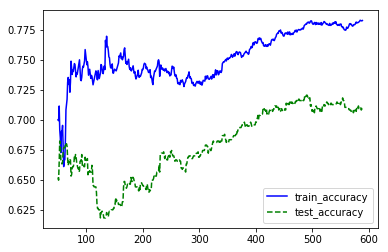

In [100]:
number,train_scores,test_scores = learning_curve
plt.plot(number,train_scores.mean(axis=1),'b-',label='train_accuracy')
plt.plot(number,test_scores.mean(axis=1),'g--',label='test_accuracy')
plt.legend()
plt.show()
#还是欠拟合

In [106]:
#逻辑回归

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
param_distribs = {
    'C':[0.01,0.1,1,10,100,1000],
    'penalty':['l1','l2'] 
}
random_search = sklearn.model_selection.RandomizedSearchCV(
    lr_clf,
    param_distributions = param_distribs,
    scoring = 'accuracy',
    cv = 10,
    verbose=2
)
random_search.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ................................ penalty=l2, C=0.1, total=   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ................................ penalty=l1, C=0.1, total=   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ................................ penalty=l1, C=0.1, total=   0.0s
[CV] 

[CV] ................................ penalty=l1, C=100, total=   0.3s
[CV] penalty=l1, C=100 ...............................................
[CV] ................................ penalty=l1, C=100, total=   0.2s
[CV] penalty=l1, C=100 ...............................................
[CV] ................................ penalty=l1, C=100, total=   0.3s
[CV] penalty=l1, C=100 ...............................................
[CV] ................................ penalty=l1, C=100, total=   0.1s
[CV] penalty=l1, C=100 ...............................................
[CV] ................................ penalty=l1, C=100, total=   0.1s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ............................... penalty=l2, C=0.01, total=   0.0s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ............................... penalty=l2, C=0.01, total=   0.0s
[CV] penalty=l2, C=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.9s finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

In [108]:
random_search.best_score_

0.819304152637486

In [ ]:
#SVC
from sklearn.svm import SVC
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
